In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
plt.style.use('ggplot')
import matplotlib as mpl


In [3]:
pd.set_option('display.max_colwidth', 200)
us_data = pd.read_csv('data/cdc_npao_us.csv')
cali_fv = pd.read_csv('data/fv_consum_ca_2012_2013.csv')

In [9]:
us_data.head()
us_data['Question'].unique()
us_data.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [10]:
# data points regarding the question that I want to look into, obesity % and consumtion of vegetables
q = ['Percent of adults aged 18 years and older who have obesity',
     'Percent of adults who report consuming vegetables less than one time daily']

In [11]:
# dropping some unnecessary columns
us_data = us_data.drop(['LocationAbbr', 'Datasource', 'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 
                        'Data_Value_Footnote','YearEnd', 'Class','Topic','Data_Value_Type','ClassID',
                       'TopicID','QuestionID','DataValueTypeID','StratificationCategoryId1'],1)

In [13]:
#finding the national adult obseity % for each year, 2011 - 2015
national_ob = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) & 
                     (us_data['StratificationCategory1'] == 'Total')]
national_ob.set_index('YearStart', inplace = True)
national_ob = national_ob.sort_index()
national_ob_lst = national_ob['Data_Value'].values.tolist()
national_ob_mean = national_ob['Data_Value'].mean()
#national_ob
print('The mean for national percent of adults with obesity for 2011 to 2015: ', national_ob_mean)

The mean for national percent of adults with obesity for 2011 to 2015:  28.24


### Find most/least obese states for years 2011 to 2015

In [16]:
#2011 %obseity weighted mean across all states using 'total'
df_wt_11 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2011) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2011_mean = (df_wt_11['Data_Value']*df_wt_11['Sample_Size']).sum()/df_wt_11['Sample_Size'].sum()
n_2011_mean

27.43593392819205

In [17]:
#2012 %obseity weighted mean across all states using 'total'
df_wt_12 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2012) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2012_mean = (df_wt_12['Data_Value']*df_wt_12['Sample_Size']).sum()/df_wt_12['Sample_Size'].sum()
n_2012_mean

27.817704814236933

In [18]:
#2013 %obseity weighted mean across all states using 'total'
df_wt_13 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2013) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2013_mean = (df_wt_13['Data_Value']*df_wt_13['Sample_Size']).sum()/df_wt_13['Sample_Size'].sum()
n_2013_mean

28.317782661160628

In [19]:
#2014 %obseity weighted mean across all states using 'total'
df_wt_14 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2014) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2014_mean = (df_wt_14['Data_Value']*df_wt_14['Sample_Size']).sum()/df_wt_14['Sample_Size'].sum()
n_2014_mean

29.044841118049632

In [20]:
#2015 %obseity weighted mean across all states using 'total'
df_wt_15 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2015) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2015_mean = (df_wt_15['Data_Value']*df_wt_15['Sample_Size']).sum()/df_wt_15['Sample_Size'].sum()
n_2015_mean

29.072455302697392

In [23]:
weighted_national_mean = [n_2011_mean, n_2012_mean, n_2013_mean, n_2014_mean, n_2015_mean]
weighted_national_mean
#sum(weighted_national_mean)/len(weighted_national_mean)

[27.43593392819205,
 27.817704814236933,
 28.317782661160628,
 29.044841118049632,
 29.072455302697392]

In [24]:
#using the 'National' filter to find national %obesity mean
def find_national_mean(df, year:int, q):
    df_1 = df[(df['LocationDesc']=='National')]
    df_2 = df_1[(df_1['Question'] == q[0]) & (df_1['YearStart'] == year) & (df_1['StratificationCategory1'] == 'Total')]
    return df_2['Data_Value'].values

In [116]:
n_mean = [] #list of national mean %obesity from 2011 - 2015
for i in range(2011, 2016):
    n_mean.append(find_national_mean(us_data, i, q))
    
n_mean #the weighted mean for each year is: 27.4359, 27.8177, 28.3178, 29.0448, 29.0725

[array([27.4]), array([27.7]), array([28.3]), array([28.9]), array([28.9])]

In [190]:
#national mean across all years 
m = sum(n_mean)/len(n_mean)

#or weighted by national population, national mean for years 2011 - 2015
(national_ob['Data_Value']*national_ob['Sample_Size']).sum()/national_ob['Sample_Size'].sum()

28.21139492793246

In [31]:
# finding top/bottom 5 states of obseity for each year% 

def find_state_mean(df, year, q):
    df_filtered = df[~(df['LocationDesc']=='National')]
    df_2 = df_filtered[(df_filtered['Question'] == q[0]) & (df_filtered['YearStart'] == year) & (df_filtered['StratificationCategory1'] == 'Total')]
    return df_2[['LocationDesc','Data_Value']].sort_values(['Data_Value'], ascending = True)

In [32]:
#%obesity mean for all states in different years
state_2011 = find_state_mean(us_data, 2011, q)
state_2012 = find_state_mean(us_data, 2012, q)
state_2013 = find_state_mean(us_data, 2013, q)
state_2014 = find_state_mean(us_data, 2014, q)
state_2015 = find_state_mean(us_data, 2015, q)

state_2015.head()

,LocationDesc,Data_Value
46058,Colorado,20.2
46222,District of Columbia,22.1
46388,Hawaii,22.7
47226,Montana,23.6
46004,California,24.2


In [33]:
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

dfs[4].iloc[:5,1] #getting the top 5 state with the least %obesity in their populaiton for 2015

46058    20.2
46222    22.1
46388    22.7
47226    23.6
46004    24.2
Name: Data_Value, dtype: float64

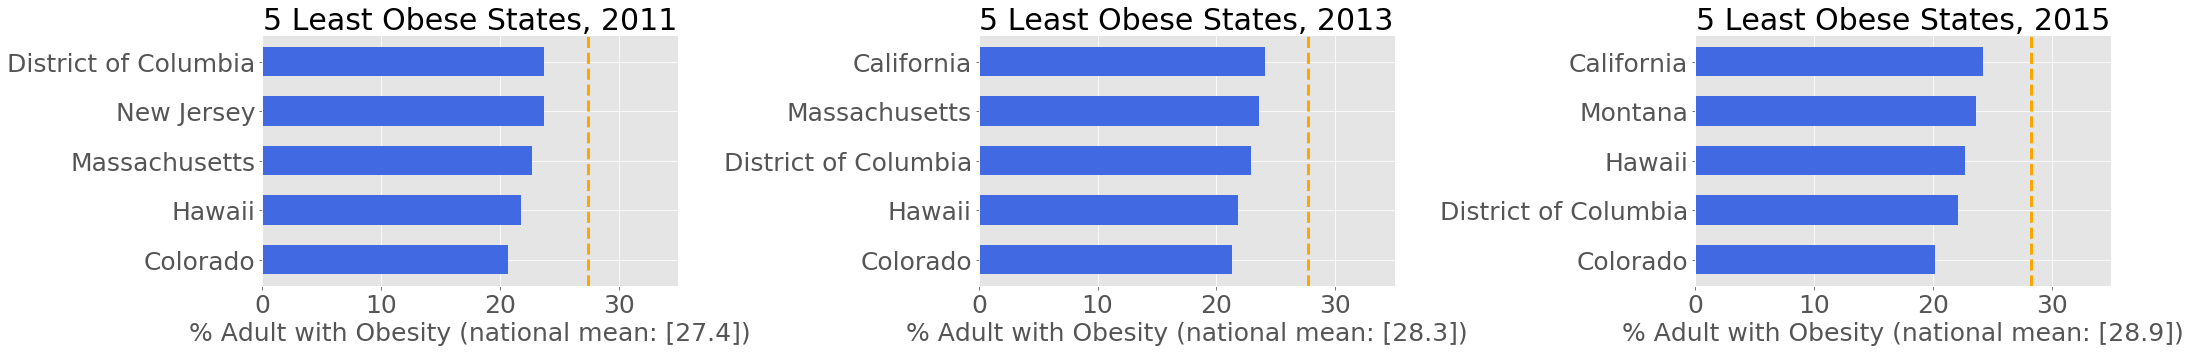

In [124]:
# 3 least obese states for years 2011 to 2015, weighted national avg for each year is marked in orange
dfs = [state_2011, state_2013, state_2015]    
year = [2011, 2013, 2015]
fig, axs = plt.subplots(1,3, figsize = (30,5))
x = np.linspace(20, 37, num=16)

for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[:5,0], dfs[idx].iloc[:5,1], height=0.6, color='royalblue')
    ax.axvline(n_mean[idx], linestyle='--', color='orange', linewidth=3)
    ax.set_xlim(None, 35)
    ax.set_title('5 Least Obese States, '+str(year[idx]), fontsize=30)
    mpl.rcParams['xtick.labelsize'] = 25
    ax.set_xlabel('% Adult with Obesity (national mean: '+str(n_mean_odd[idx])+')', fontsize=25)
    mpl.rcParams['ytick.labelsize'] = 25


fig.tight_layout()


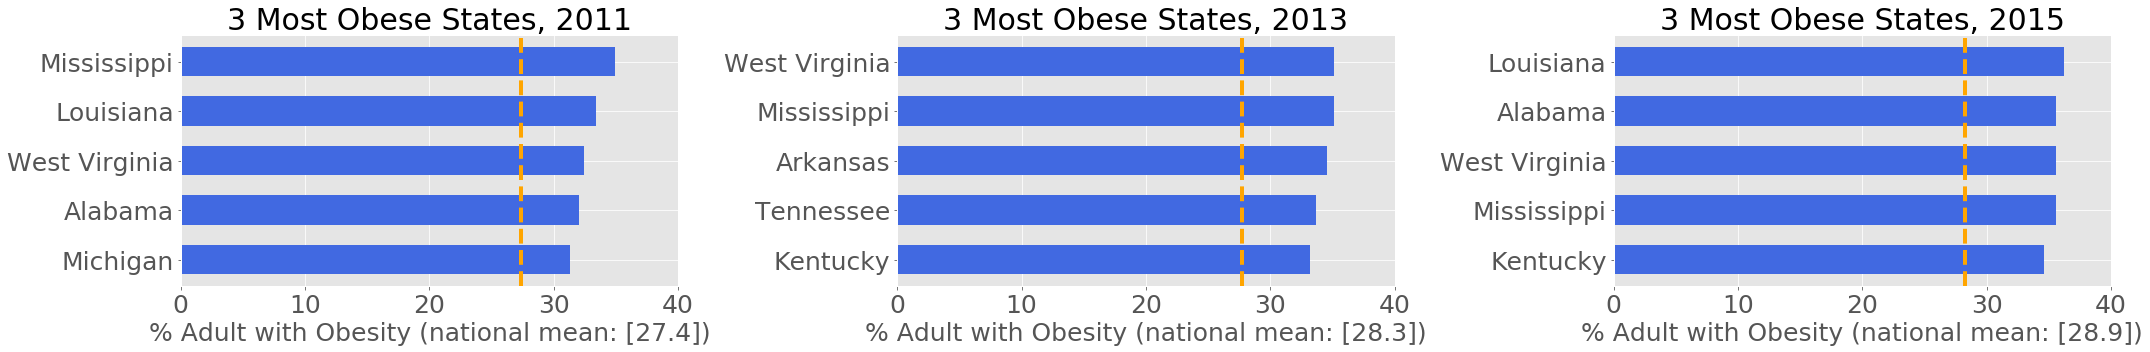

In [123]:
# 3 most obese states from 2011 to 2015, weighted national avg for each year is marked in orange
#dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    
fig, axs = plt.subplots(1,3, figsize = (30,5))
x = np.linspace(20, 37, num=16)
n_mean_odd = n_mean[0:5:2]
for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[-5:,0], dfs[idx].iloc[-5:,1], height=0.6, color='royalblue')
    ax.axvline(n_mean[idx], linestyle='--', color='orange', linewidth=4)
    ax.set_xlim(None, 40)
    ax.set_title('3 Most Obese States, '+str(year[idx]), fontsize=30)
    mpl.rcParams['xtick.labelsize'] = 25
    ax.set_xlabel('% Adult with Obesity (national mean: '+str(n_mean_odd[idx])+')', fontsize=25)
    mpl.rcParams['ytick.labelsize'] = 25
    ax.yaxis.set_tick_params(rotation=0)
    

    


plt.tight_layout()

### GENDER

In [125]:
#focusing on gender, excluding 'National', 'Guam', 'Puerto Rico' 
us_gender = us_data[(us_data['Question'] == q[0]) & (us_data['StratificationCategory1'] == 'Gender') 
                    & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                    &~(us_data['LocationDesc']=='Puerto Rico')]

In [126]:
#finding the national female obseity % for each year, 2011 - 2015
#finding national female %obesity mean across all years
n_female_fiveyr = us_data[(us_data['LocationDesc'] == 'National')&(us_data['Question'] == q[0])
                        &(us_data['StratificationID1'] == 'FEMALE')]
n_female_fiveyr.set_index('YearStart', inplace = True)
n_female_fiveyr = n_female_fiveyr.sort_index()
n_female_fiveyr_lst = n_female_fiveyr['Data_Value'].values.tolist()
n_female_fiveyr['Data_Value'].mean() #national female %obesity mean
n_female_fiveyr[['Question','LocationDesc','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

,Question,LocationDesc,Data_Value,Sample_Size,StratificationCategory1,Stratification1
YearStart,,,,,,
2011,Percent of adults aged 18 years and older who have obesity,National,27.1,278712.0,Gender,Female
2012,Percent of adults aged 18 years and older who have obesity,National,27.4,257190.0,Gender,Female
2013,Percent of adults aged 18 years and older who have obesity,National,28.3,263276.0,Gender,Female
2014,Percent of adults aged 18 years and older who have obesity,National,28.8,242169.0,Gender,Female
2015,Percent of adults aged 18 years and older who have obesity,National,28.6,221909.0,Gender,Female


In [127]:
#finding weighted mean across all states for each year, female
def weighted_f_mean (df, year):
    test_f = df[(df['Stratification1']=='Female')&(df['YearStart']==year)]
    test_f_mean = (test_f['Data_Value']*test_f['Sample_Size']).sum()/test_f['Sample_Size'].sum()
    return test_f_mean
years = [2011, 2012, 2013, 2014, 2015]
lst_weighted_f_mean = []
for year in years:
    lst_weighted_f_mean.append(weighted_f_mean(us_gender, year)) 

lst_weighted_f_mean #comparing to the "National" female %obesity shown in the cell above, the two results are close but not the same

[27.05274584517351,
 27.560455305416227,
 28.069373964964523,
 28.79946483653977,
 28.6118557606947]

(array([ 7.,  7., 38., 38., 37., 49., 36., 24., 10.,  9.]),
 array([18.7 , 20.62, 22.54, 24.46, 26.38, 28.3 , 30.22, 32.14, 34.06,
        35.98, 37.9 ]),
 <a list of 10 Patch objects>)

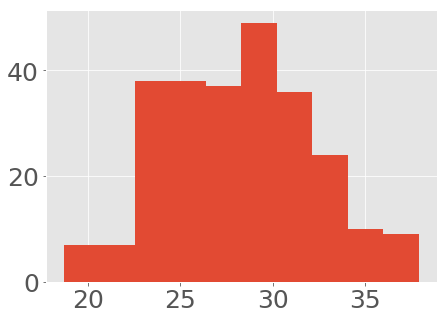

In [128]:
#the mean from this histogram should NOT be used due the different weight in population across states
us_gender_female = us_gender[us_gender['Stratification1'] == 'Female']
female_obesity = us_gender_female['Data_Value'].values

bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(female_obesity)


In [129]:
#finding the national male obseity % for each year, 2011 - 2015
#finding national male %obeisty mean across all years
n_male_fiveyr = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) 
        & (us_data['StratificationCategory1'] == 'Gender') & (us_data['Stratification1'] == 'Male')]
n_male_fiveyr.set_index('YearStart', inplace = True)
n_male_fiveyr = n_male_fiveyr.sort_index()
n_male_fiveyr_lst = n_male_fiveyr['Data_Value'].values.tolist()
n_male_fiveyr['Data_Value'].mean() #national male %obesity mean
n_male_fiveyr[['Question','LocationDesc','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

,Question,LocationDesc,Data_Value,Sample_Size,StratificationCategory1,Stratification1
YearStart,,,,,,
2011,Percent of adults aged 18 years and older who have obesity,National,27.8,191988.0,Gender,Male
2012,Percent of adults aged 18 years and older who have obesity,National,28.0,185040.0,Gender,Male
2013,Percent of adults aged 18 years and older who have obesity,National,28.3,194211.0,Gender,Male
2014,Percent of adults aged 18 years and older who have obesity,National,29.0,183706.0,Gender,Male
2015,Percent of adults aged 18 years and older who have obesity,National,29.1,176407.0,Gender,Male


(array([ 4.,  5.,  4., 25., 41., 65., 52., 35., 20.,  4.]),
 array([17.6 , 19.58, 21.56, 23.54, 25.52, 27.5 , 29.48, 31.46, 33.44,
        35.42, 37.4 ]),
 <a list of 10 Patch objects>)

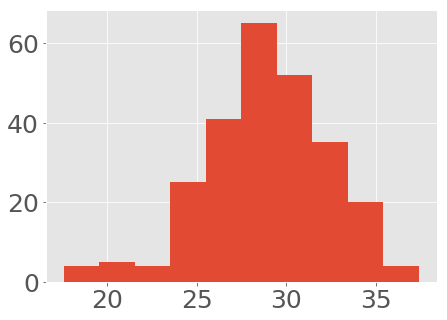

In [130]:
#the mean from this historgram should NOT be used due to the population weight difference across states
us_gender_male = us_gender[us_gender['Stratification1'] == 'Male']
male_obesity = us_gender_male['Data_Value'].values

#bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(male_obesity)


In [159]:
#finding the national weighted %obesity mean based on male & female
gender_n_mean = (((n_female_fiveyr['Sample_Size']*n_female_fiveyr['Data_Value']).sum()
  + (n_male_fiveyr['Sample_Size']*n_male_fiveyr['Data_Value']).sum())
 /(n_female_fiveyr['Sample_Size'].sum() + n_male_fiveyr['Sample_Size'].sum()))
                                               
#this weighted national mean for 5 years is relatively similar to the mean calculated from using the "National" filter
#mean from "National" filter = 28.2
                                               

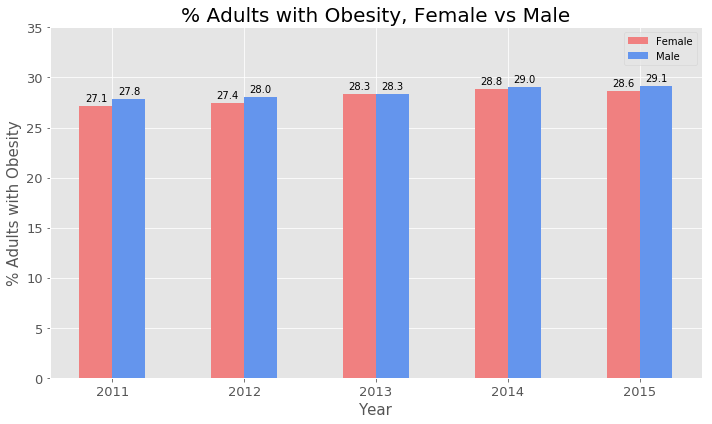

In [180]:
fig, ax = plt.subplots(figsize = (10, 6))

width = 0.25
years_t = [2011, 2012, 2913, 2014, 2015]
x = np.arange(len(years_t))

y_f = n_female_fiveyr['Data_Value'].values
y_m = n_male_fiveyr['Data_Value'].values
fe = ax.bar(x - width/2, y_f, width, color='lightcoral', label='Female')
ma = ax.bar(x + width/2, y_m, width, color='cornflowerblue', label='Male')
ax.legend()
#ax.axhline(gender_n_mean, linestyle='--', color='black')

#to add value onto each bar
def label_v(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
label_v(fe)
label_v(ma)

ax.set_xlabel('Year', size=15)
ax.set_ylabel('% Adults with Obesity', size=15)
ax.set_ylim(0, 35)
ax.set_xticklabels(years)
ax.set_xticks(x)
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
ax.set_title('% Adults with Obesity, Female vs Male', size=20)
fig.tight_layout()


In [ ]:
#hypothesis testing



### INCOME 

In [181]:
income_states = us_data[(us_data['StratificationCategory1'] == 'Income') & (us_data['Question'] == q[0]) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]
income_states = income_states.reset_index(drop = True)

income_national = us_data[(us_data['StratificationCategory1'] == 'Income') & (us_data['Question'] == q[0]) 
                            & (us_data['LocationDesc']=='National')]
income_national.head(2)

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
18197,2011,National,Percent of adults aged 18 years and older who have obesity,31.3,31.3,30.6,32.0,74049.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,NaN,59,Income,"$15,000 - $24,999",INC1525
18250,2011,National,Percent of adults aged 18 years and older who have obesity,32.3,32.3,31.4,33.2,49598.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,59,Income,"Less than $15,000",INCLESS15


In [182]:
#finding the average %obesity across all states for 2013, based on 'National' filter in the dataset
income_n_2013 = income_national[income_national['YearStart']==2013]
income_n_2013 = income_n_2013[['YearStart','LocationDesc','Data_Value','Sample_Size','Stratification1']]
income_n_2013 = income_n_2013[~(income_n_2013['Stratification1']=='Data not reported')]
income_n_2013

,YearStart,LocationDesc,Data_Value,Sample_Size,Stratification1
18583,2013,National,33.6,46889.0,"Less than $15,000"
18584,2013,National,32.3,71389.0,"$15,000 - $24,999"
18585,2013,National,29.8,46125.0,"$25,000 - $34,999"
18586,2013,National,30.0,58655.0,"$35,000 - $49,999"
18587,2013,National,28.8,62562.0,"$50,000 - $74,999"
18588,2013,National,23.9,111798.0,"$75,000 or greater"


In [183]:
#putting into function, return national average %obesity across all states, found based on 'National' filter
def income_national_ob(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['Data_Value','Sample_Size','Stratification1']]
    df1 = df1[~(df1['Stratification1']=='Data not reported')].sort_values(by='Data_Value')
    #df2 = df1.reset_index(inplace=True)
    df1.rename(columns={"Stratification1": "Income_Level", "Data_Value": str(year)+"_%Obesity", 
                       'Sample_Size':str(year)+'_Sample_Size'}, inplace=True)
    
    return df1

In [184]:
income_n_2011 = income_national_ob(income_national, 2011)
income_n_2011

,2011_%Obesity,2011_Sample_Size,Income_Level
18254,22.8,110120.0,"$75,000 or greater"
18253,28.4,64688.0,"$50,000 - $74,999"
18252,28.7,61354.0,"$35,000 - $49,999"
18251,29.5,48943.0,"$25,000 - $34,999"
18197,31.3,74049.0,"$15,000 - $24,999"
18250,32.3,49598.0,"Less than $15,000"


In [185]:
income_n_2011 = income_national_ob(income_national, 2011)
income_n_2012 = income_national_ob(income_national, 2012)
income_n_2013 = income_national_ob(income_national, 2013)
income_n_2014 = income_national_ob(income_national, 2014)
income_n_2015 = income_national_ob(income_national, 2015)


df_income_n = income_n_2011.set_index('Income_Level').join(income_n_2012.set_index(
    'Income_Level')).join(income_n_2013.set_index('Income_Level')).join(income_n_2014.set_index('Income_Level')).join(income_n_2015.set_index('Income_Level'))

df_income_n #returns joined table with for years 2011-2015, income_leve vs %obesity


,2011_%Obesity,2011_Sample_Size,2012_%Obesity,2012_Sample_Size,2013_%Obesity,2013_Sample_Size,2014_%Obesity,2014_Sample_Size,2015_%Obesity,2015_Sample_Size
Income_Level,,,,,,,,,,
"$75,000 or greater",22.8,110120.0,23.4,107562.0,23.9,111798.0,25.1,112498.0,24.6,109789.0
"$50,000 - $74,999",28.4,64688.0,28.9,61143.0,28.8,62562.0,29.2,59297.0,29.9,54950.0
"$35,000 - $49,999",28.7,61354.0,28.5,57017.0,30.0,58655.0,30.7,54340.0,30.6,48843.0
"$25,000 - $34,999",29.5,48943.0,29.2,44721.0,29.8,46125.0,31.1,41727.0,32.1,36483.0
"$15,000 - $24,999",31.3,74049.0,31.6,69410.0,32.3,71389.0,32.2,62892.0,33.2,53993.0
"Less than $15,000",32.3,49598.0,33.1,46419.0,33.6,46889.0,35.2,39123.0,34.8,33296.0


In [186]:
df_income_plt = df_income_n.iloc[:,0:9:2]
df_income_plt

,2011_%Obesity,2012_%Obesity,2013_%Obesity,2014_%Obesity,2015_%Obesity
Income_Level,,,,,
"$75,000 or greater",22.8,23.4,23.9,25.1,24.6
"$50,000 - $74,999",28.4,28.9,28.8,29.2,29.9
"$35,000 - $49,999",28.7,28.5,30.0,30.7,30.6
"$25,000 - $34,999",29.5,29.2,29.8,31.1,32.1
"$15,000 - $24,999",31.3,31.6,32.3,32.2,33.2
"Less than $15,000",32.3,33.1,33.6,35.2,34.8


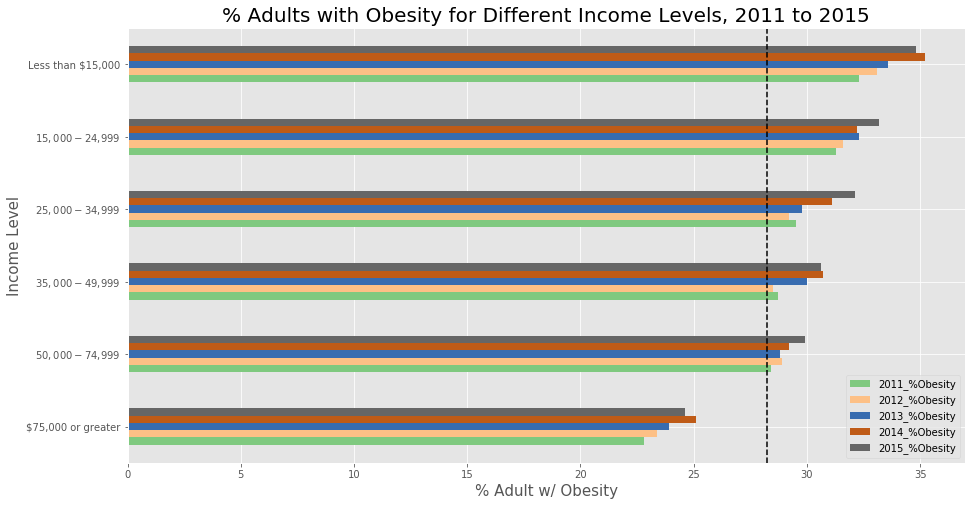

In [191]:
from statistics import mean 

inc_level = ['>75,000','50,000−74,999','35,000−49,999','25,000−34,999','15,000−24,999','<15,000']
# inc_2011 = df_income['2011_%Obesity'].values
# inc_2012 = df_income['2012_%Obesity'].values
# inc_2013 = df_income['2013_%Obesity'].values
# inc_2014 = df_income['2014_%Obesity'].values
# inc_2015 = df_income['2015_%Obesity'].values
m = sum(n_mean)/len(n_mean) #national mean %obesity, by averaging year 2011 - 2015
df_income_plt = df_income_n.iloc[:,0:9:2]
ax = df_income_plt.plot.barh(figsize = (15, 8), colormap = 'Accent')
ax.axvline(m, linestyle='--', color='black')

ax.set_xlabel('% Adult w/ Obesity', size=15)
ax.set_ylabel('Income Level', size=15)
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
ax.set_title('% Adults with Obesity for Different Income Levels, 2011 to 2015', size=20)
fig.tight_layout()
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# >>> ax = df.plot.barh()

hypothesis testing

effect of low vs high income level on % obesity in the population

- null: low (<25,000) and high (>50,000) has the same obesity rate
- alternate: low_income has higher obesity rate than high_income 

In [192]:
# finding low income total sample and number of people with obesity, <25,000
# focusing on Louisiana, 2015

income_lou = income_states[(income_states['LocationDesc'] == 'Louisiana') & (income_states['YearStart']==2015)]
#income_lou['Stratification1'] = income_lou["Stratification1"].astype(str)
income_lou_low = income_lou[(income_lou['StratificationID1'] == 'INCLESS15') | (income_lou['StratificationID1'] == 'INC1525')]\

income_lou_low_tsize = income_lou_low['Sample_Size'].sum() #1244

income_lou_low_obsize = ((income_lou_low['Data_Value']/100)*income_lou_low['Sample_Size']).sum() #522.772
income_lou_low_nobsize = income_lou_low_tsize - income_lou_low_obsize #721.228

#income_lou

In [241]:
# finding high income total sample and number of people with obesity >50,000
# focusing on Louisiana, 2015

income_lou_h = income_lou[(income_lou['StratificationID1'] == 'INC75PLUS') | (income_lou['StratificationID1'] == 'INC5075')]

income_lou_h_tsize = income_lou_h['Sample_Size'].sum() #1431
income_lou_h_obsize = ((income_lou_h['Data_Value']/100)*income_lou_h['Sample_Size']).sum()#475.287
income_lou_h_nobsize = income_lou_h_tsize - income_lou_h_obsize #955.713

# total number of samples for low and high income level
income_lou_tsize = income_lou_low_tsize + income_lou_h_tsize #2675.0
income_lou_tsize


2675.0

In [245]:
shared_sample_freq_lou = (income_lou_low_obsize + income_lou_h_obsize) / income_lou_tsize
shared_sample_variance_lou = income_lou_tsize * (shared_sample_freq_lou * (1 - shared_sample_freq_lou)) / (income_lou_low_tsize*income_lou_h_tsize)

diff_in_prop_lou = stats.norm(0, np.sqrt(shared_sample_variance_lou))

In [247]:
low_sample_freq_lou = income_lou_low_obsize / income_lou_low_tsize #0.42023
high_sample_freq_lou = income_lou_h_obsize / income_lou_h_tsize #0.3321

diff_in_sample_prop_lou = low_sample_freq_lou - high_sample_freq_lou #0.088098

print("Difference in sample proportions: {:2.2f}".format(diff_in_sample_prop))

Difference in sample proportions: 0.09


In [248]:
#z test
p_value = 1-diff_in_prop_lou.cdf(diff_in_sample_prop_lou)
print("p-value for obesity frequency comparison: {:2.10f}".format(p_value)) 


p-value for obesity frequency comparison: 0.0000013060


In [251]:
# finding low income total sample and number of people with obesity, <25,000
# focusing on Louisiana, all years

income_l = income_states[(income_states['LocationDesc'] == 'Louisiana')] #& (income_states['YearStart']==2015)]
#income_co['Stratification1'] = income_lou["Stratification1"].astype(str)
income_l_low = income_l[(income_l['StratificationID1'] == 'INCLESS15') | (income_l['StratificationID1'] == 'INC1525')]

l_low = income_l_low['Data_Value'].values
l_low

array([35.4, 36.7, 44.5, 38.2, 40.3, 36.8, 40. , 36.1, 41.3, 43.1])

In [253]:
# finding high income total sample and number of people with obesity >50,000
# focusing on Louisiana, all years

income_l_h = income_l[(income_l['StratificationID1'] == 'INC75PLUS') | (income_l['StratificationID1'] == 'INC5075')]

l_high = income_l_h['Data_Value'].values
l_high


array([36.8, 29.9, 31.7, 32.8, 28.7, 30.6, 33. , 33.7, 32.7, 34.2])

In [254]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [257]:
test_statistic_l = welch_test_statistic(l_high, l_low)
print("Welch Test Statistic: {:2.2f}".format(test_statistic_l))

Welch Test Statistic: -5.87


In [258]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [259]:
df = welch_satterhwaithe_df(l_high, l_low)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))


Degrees of Freedom for Welch's Test: 16.68


In [263]:
students = stats.t(df)

p_value = students.cdf(test_statistic_l) + (1 - students.cdf(-test_statistic_l))
print("p-value for different average obesity rate: {:2.10f}".format(p_value))


p-value for different average kickflip height: 0.0000198536


In [265]:
#try to conclude that high income is better(lower rate)

test_statistic_2 = welch_test_statistic(l_low, l_high)
p_value_2 = 1 - students.cdf(test_statistic_2)
print("p-value for high-income obesity rate better than low-income obesity rate: {:2.10f}".format(p_value_2))


p-value for high-income obesity rate better than low-income obesity rate: 0.0000099268


Text(0.5,1,"Distribution of Welsh's Test Statistic Under the Null Hypothesis, p-value: 0.00002")

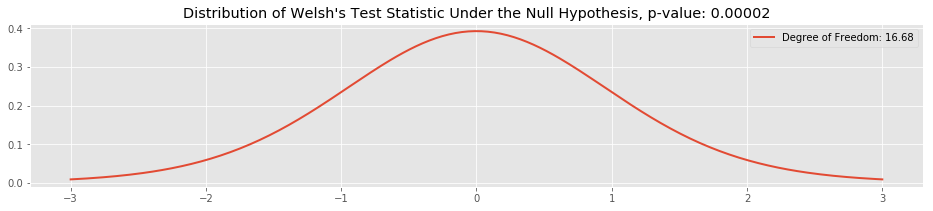

In [268]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic_l), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic_l), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis, p-value: 0.00002")

In [269]:
#U test

def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [271]:
high_wins = count_winning_pairs(l_high, l_low)
low_wins = count_winning_pairs(l_low, l_high)
print("Number of High-income Wins: {}".format(high_wins))
print("Number of Low-income Wins: {}".format(low_wins))

Number of High-income Wins: 3.5
Number of Low-income Wins: 96.5


High income's obesity rates are equaliy likely to be higher than low income's as the other way around. 

In [276]:
res = stats.mannwhitneyu(l_high, l_low, alternative="less")
print(res)
print("p-value: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=3.5, pvalue=0.00025203790867089817)
p-value: 0.000


### EDUCATION

In [279]:
edu_obes_s = us_data[(us_data['StratificationCategory1'] == 'Education') & (us_data['Question'] == q[0]) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]

edu_obes_s = edu_obes_s.reset_index(drop = True)

edu_obes_n = us_data[(us_data['StratificationCategory1'] == 'Education') & (us_data['Question'] == q[0]) 
                            & (us_data['LocationDesc']=='National')]

In [280]:
#finding national %obesity for each year, using the 'National' filter

edu_n = edu_obes_n[edu_obes_n['YearStart']==2013]
edu_n = edu_n[['YearStart','LocationDesc','Data_Value','Stratification1']].sort_values(by='Data_Value')
#edu = edu.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
edu_n = edu_n.reset_index()

edu_n.rename(columns={"Stratification1": "Education_Level", "Data_Value": "2013_%Obesity"})                                     
                                      
                                      


,index,YearStart,LocationDesc,2013_%Obesity,Education_Level
0,18576,2013,National,20.9,College graduate
1,18575,2013,National,29.6,Some college or technical school
2,18574,2013,National,30.7,High school graduate
3,18573,2013,National,34.1,Less than high school


In [360]:
#function for a DataFrame focusing on education level and %obesity for years 2011-2015, nationally
def obesity_edu(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['Sample_Size','Data_Value','Stratification1']].sort_values(by='Data_Value')
    #df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
    #df1 = df1.reset_index()
    df1.rename(columns={"Stratification1": "Education_Level", "Data_Value": str(year)+"_%Obesity", 
                       "Sample_Size": str(year)+"_Sample_Size"}, inplace=True)
    
    return df1



In [361]:
edu_n_2011 = obesity_edu(edu_obes_n, 2011)
edu_n_2012 = obesity_edu(edu_obes_n, 2012)
edu_n_2013 = obesity_edu(edu_obes_n, 2013)
edu_n_2014 = obesity_edu(edu_obes_n, 2014)
edu_n_2015 = obesity_edu(edu_obes_n, 2015)
df_edu_n = edu_n_2011.set_index('Education_Level').join(edu_n_2012.set_index(
    'Education_Level')).join(edu_n_2013.set_index('Education_Level')).join(edu_n_2014.set_index('Education_Level')).join(edu_n_2015.set_index('Education_Level'))

df_edu_n

,2011_Sample_Size,2011_%Obesity,2012_Sample_Size,2012_%Obesity,2013_Sample_Size,2013_%Obesity,2014_Sample_Size,2014_%Obesity,2015_Sample_Size,2015_%Obesity
Education_Level,,,,,,,,,,
College graduate,162648.0,20.6,153786.0,21.2,160091.0,20.9,155627.0,21.8,148030.0,21.7
Some college or technical school,127160.0,28.6,120032.0,28.7,125709.0,29.6,116243.0,30.2,109147.0,30.2
High school graduate,138994.0,29.7,130030.0,29.9,133402.0,30.7,120826.0,31.4,110951.0,31.7
Less than high school,41022.0,32.4,37655.0,32.9,37398.0,34.1,32260.0,34.4,29309.0,34.0


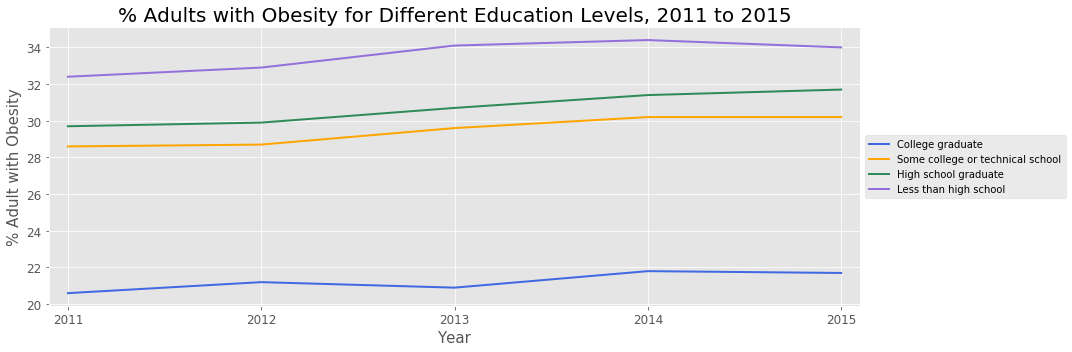

In [362]:
fig, axs = plt.subplots(figsize=(15,5))

x = [2011,2012,2013,2014,2015]
color= ['royalblue','orange','seagreen','mediumpurple']
for idx, val in enumerate(df_edu_n.index):
    axs.plot(x, df_edu_n.iloc[idx, 1:10:2], label=df_edu_n.index[idx],linewidth=2, color=color[idx])
                                                                                            

axs.set_xlabel('Year', size=15)
axs.set_ylabel('% Adult with Obesity', size=15)
axs.set_xticks(range(2011, 2016))
axs.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
axs.set_xlim(2010.9, 2015.1)

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
axs.set_title('% Adults with Obesity for Different Education Levels, 2011 to 2015', size=20)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()



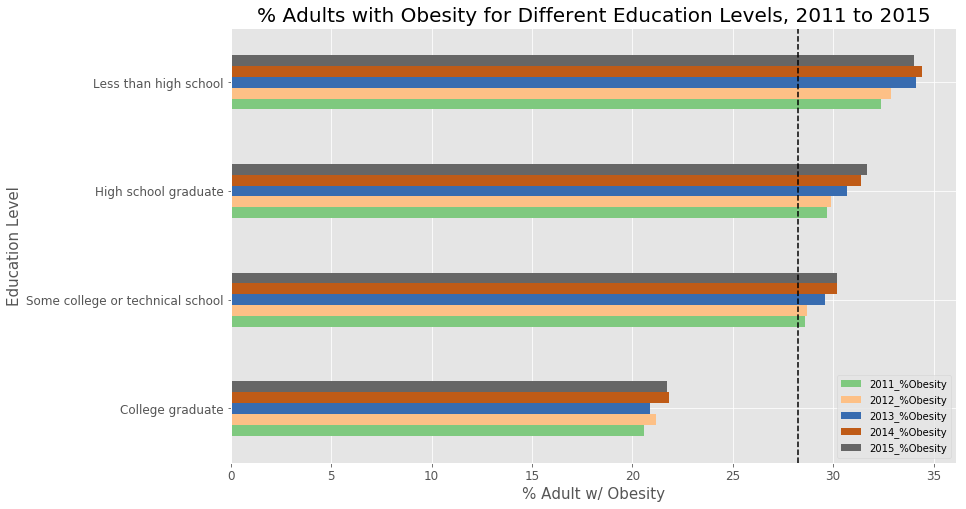

In [363]:
edu_level = ['Less than high school','High school graduate', 'Some college/technical shool','College graduate']

#m = sum(n_mean)/len(n_mean) #national mean %obesity, by averaging year 2011 - 2015
#df_income_plt = df_income_n.iloc[:,0:9:2]
df_edu_plt = df_edu_n.iloc[:, 1:10:2]
ax = df_edu_plt.plot.barh(figsize = (13, 8), colormap = 'Accent')
ax.axvline(m, linestyle='--', color='black')

ax.set_xlabel('% Adult w/ Obesity', size=15)
ax.set_ylabel('Education Level', size=15)
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
ax.set_title('% Adults with Obesity for Different Education Levels, 2011 to 2015', size=20)
fig.tight_layout()
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# >>> ax = df.plot.barh()

In [364]:
edu_obes_s.head(3)

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
0,2011,Alabama,Percent of adults aged 18 years and older who have obesity,33.6,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school,EDUHS
1,2011,Alabama,Percent of adults aged 18 years and older who have obesity,32.8,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate,EDUHSGRAD
2,2011,Alabama,Percent of adults aged 18 years and older who have obesity,33.8,33.8,31.0,36.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Some college or technical school,EDUCOTEC


In [365]:
#hypothesis testing, continue with Louisiana
#null: THERE IS NO DIFFERENCE IN THE AVERAGE OBESTIY RATE BETWEEN SOME COLLEGE AND HISH SCHOOL GRADUATE
edu_l = edu_obes_s[edu_obes_s['LocationDesc']=='Louisiana']
                   
edu_l_2011 = obesity_edu(edu_l, 2011)
edu_l_2012 = obesity_edu(edu_l, 2012)
edu_l_2013 = obesity_edu(edu_l, 2013)
edu_l_2014 = obesity_edu(edu_l, 2014)
edu_l_2015 = obesity_edu(edu_l, 2015)
edu_l_2015

,2015_Sample_Size,2015_%Obesity,Education_Level
888,1238.0,29.1,College graduate
889,1132.0,35.2,Some college or technical school
890,1417.0,39.2,High school graduate
891,531.0,40.2,Less than high school


In [366]:
df_edu_l = edu_l_2011.set_index('Education_Level').join(edu_l_2012.set_index(
    'Education_Level')).join(edu_l_2013.set_index('Education_Level')).join(edu_l_2014.set_index('Education_Level')).join(edu_l_2015.set_index('Education_Level'))

df_edu_l

,2011_Sample_Size,2011_%Obesity,2012_Sample_Size,2012_%Obesity,2013_Sample_Size,2013_%Obesity,2014_Sample_Size,2014_%Obesity,2015_Sample_Size,2015_%Obesity
Education_Level,,,,,,,,,,
College graduate,2751.0,26.6,2244.0,28.3,1600.0,25.8,1873.0,30.7,1238.0,29.1
High school graduate,3569.0,33.6,3012.0,34.0,1615.0,34.7,2008.0,37.1,1417.0,39.2
Some college or technical school,2519.0,35.8,2115.0,37.5,1285.0,32.5,1715.0,34.4,1132.0,35.2
Less than high school,1552.0,36.3,1276.0,38.6,509.0,38.8,759.0,36.1,531.0,40.2


In [369]:
college = df_edu_l.iloc[0,1:10:2].tolist()
hs = df_edu_l.iloc[1,1:10:2].tolist()
nohs = df_edu_l.iloc[3, 1:10:2].tolist()
somecollege = df_edu_l.iloc[2,1:10:2].tolist()
somecollege

[35.8, 37.5, 32.5, 34.4, 35.2]

***some college vs no high school***

In [450]:
test_statistic_edul = welch_test_statistic(somecollege, nohs)
print("Welch Test Statistic: {:2.2f}".format(test_statistic_edul))


Welch Test Statistic: -2.87


In [451]:
df_edul = welch_satterhwaithe_df(somecollege, nohs)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_edul))


Degrees of Freedom for Welch's Test: 7.98


In [452]:
students_edul = stats.t(df_edul)

p_value_edul = students_edul.cdf(test_statistic_edul) + (1 - students_edul.cdf(-test_statistic_edul))
print("p-value for different average % obesity: {:2.10f}".format(p_value_edul))


p-value for different average % obesity: 0.0208186323


Text(0.5,1,'p-value Reigon')

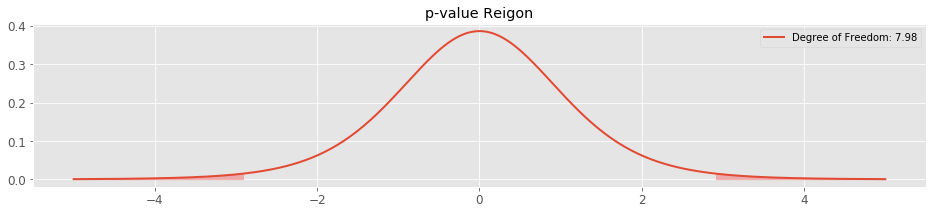

In [454]:
x = np.linspace(-5, 5, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(x, students_edul.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_edul))
_ = ax.fill_between(x, students_edul.pdf(x), where=(x >= -test_statistic_edul), color="red", alpha=0.25)
_ = ax.fill_between(x, students_edul.pdf(x), where=(x <= test_statistic_edul), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

***college graduate vs hs graduate***

In [392]:
test_statistic_edul2 = welch_test_statistic(college, hs)
print("Welch Test Statistic: {:2.2f}".format(test_statistic_edul2))

Welch Test Statistic: -6.19


In [393]:
df_edul2 = welch_satterhwaithe_df(college, hs)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_edul2))


Degrees of Freedom for Welch's Test: 7.72


In [394]:
students2 = stats.t(df_edul2)

p_value_edul2 = students2.cdf(test_statistic_edul2) + (1 - students2.cdf(-test_statistic_edul2))
print("p-value for different average % obesity: {:2.10f}".format(p_value_edul2))


p-value for different average % obesity: 0.0003019064


Text(0.5,1,'p-value Reigon')

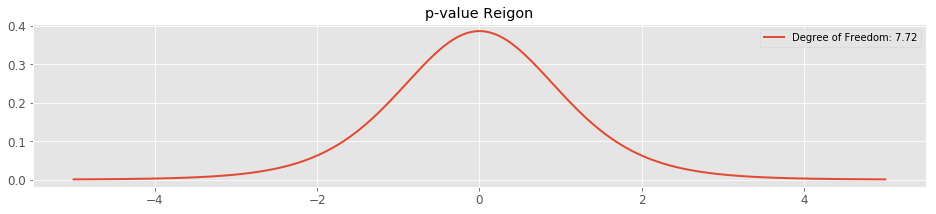

In [398]:
x = np.linspace(-5, 5, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(x, students2.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_edul2))
_ = ax.fill_between(x, students2.pdf(x), where=(x >= -test_statistic_edul2), color="red", alpha=0.25)
_ = ax.fill_between(x, students2.pdf(x), where=(x <= test_statistic_edul2), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

### AGE

In [399]:
age_s = us_data[(us_data['StratificationCategory1'] == 'Age (years)') & (us_data['Question'] == q[0]) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]

age_s = age_s.reset_index(drop = True)

age_n = us_data[(us_data['StratificationCategory1'] == 'Age (years)') & (us_data['Question'] == q[0]) 
                            & (us_data['LocationDesc']=='National')]

In [400]:
age_n_2011 = age_n[age_n['YearStart'] ==2011][['YearStart',]]
age_n_plot = age_n[['YearStart','Data_Value','Sample_Size','Stratification1']]

In [402]:
def obesity_age(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['Sample_Size','Data_Value','Stratification1']].sort_values(by='Stratification1')
    #df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
    #df1 = df1.reset_index()
    df1.rename(columns={"Stratification1": "Age", "Data_Value": str(year)+"_%Obesity", 
                       "Sample_Size": str(year)+"_Sample_Size"}, inplace=True)
    
    return df1

In [403]:
age_n_2011 = obesity_age(age_n, 2011)
age_n_2012 = obesity_age(age_n, 2012)
age_n_2013 = obesity_age(age_n, 2013)
age_n_2014 = obesity_age(age_n, 2014)
age_n_2015 = obesity_age(age_n, 2015)

df_age_n = age_n_2011.set_index('Age').join(age_n_2012.set_index(
    'Age')).join(age_n_2013.set_index('Age')).join(age_n_2014.set_index('Age')).join(age_n_2015.set_index('Age'))

df_age_n


,2011_Sample_Size,2011_%Obesity,2012_Sample_Size,2012_%Obesity,2013_Sample_Size,2013_%Obesity,2014_Sample_Size,2014_%Obesity,2015_Sample_Size,2015_%Obesity
Age,,,,,,,,,,
18 - 24,20732.0,15.2,22549.0,15.0,24785.0,15.4,21699.0,15.9,21539.0,16.7
25 - 34,44490.0,25.9,42942.0,25.6,45270.0,26.4,38517.0,27.0,37389.0,26.7
35 - 44,60254.0,29.9,55173.0,31.3,55422.0,31.7,49240.0,32.1,45319.0,32.1
45 - 54,86169.0,32.6,78037.0,32.4,78259.0,33.3,70884.0,33.7,64418.0,34.0
55 - 64,107279.0,32.6,96513.0,33.3,101611.0,33.5,96564.0,34.2,88587.0,33.4
65 or older,151776.0,25.3,144296.0,25.8,152140.0,26.5,148971.0,27.5,141064.0,27.6


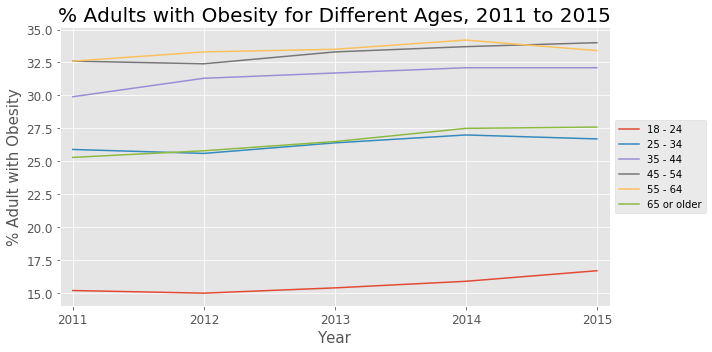

In [407]:
fig, axs = plt.subplots(figsize=(10,5))

x = [2011,2012,2013,2014,2015]

for idx, val in enumerate(df_age_n.index):
    axs.plot(x, df_age_n.iloc[idx, 1:10:2], label=df_age_n.index[idx])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


axs.set_xlabel('Year', size=15)
axs.set_ylabel('% Adult with Obesity', size=15)
axs.set_xticks(range(2011, 2016))
axs.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
axs.set_xlim(2010.9, 2015.1)

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
axs.set_title('% Adults with Obesity for Different Ages, 2011 to 2015', size=20)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()



In [408]:
#age_n_plot = age_n_plot.drop(columns='Sample_Size', axis =1)
age_n_plot
pivot_df = age_n_plot.pivot(index='YearStart', columns='Stratification1', values='Data_Value')
pivot_df

Stratification1,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 or older
YearStart,,,,,,
2011,15.2,25.9,29.9,32.6,32.6,25.3
2012,15.0,25.6,31.3,32.4,33.3,25.8
2013,15.4,26.4,31.7,33.3,33.5,26.5
2014,15.9,27.0,32.1,33.7,34.2,27.5
2015,16.7,26.7,32.1,34.0,33.4,27.6


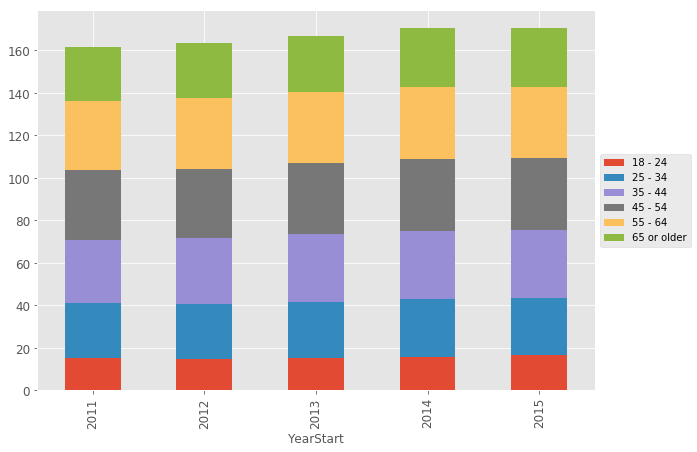

In [409]:
pivot_df.iloc[:,:].plot.bar(stacked=True, figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [415]:
age_s_lou = age_s[(age_s['LocationDesc'] == 'Louisiana')]


#income_lou['Stratification1'] = income_lou["Stratification1"].astype(str)
# income_lou_low = income_lou[(income_lou['StratificationID1'] == 'INCLESS15') | (income_lou['StratificationID1'] == 'INC1525')]\

# income_lou_low_tsize = income_lou_low['Sample_Size'].sum() #1244

# income_lou_low_obsize = ((income_lou_low['Data_Value']/100)*income_lou_low['Sample_Size']).sum() #522.772
# income_lou_low_nobsize = income_lou_low_tsize - income_lou_low_obsize #721.228

In [416]:
age_s_lou = age_s_lou[['YearStart', 'Data_Value','Sample_Size','Stratification1']]

In [418]:
age_lou_2011 = obesity_age(age_s_lou, 2011)
age_lou_2012 = obesity_age(age_s_lou, 2012)
age_lou_2013 = obesity_age(age_s_lou, 2013)
age_lou_2014 = obesity_age(age_s_lou, 2014)
age_lou_2015 = obesity_age(age_s_lou, 2015)
df_age_lou = age_lou_2011.set_index('Age').join(age_lou_2012.set_index(
    'Age')).join(age_lou_2013.set_index('Age')).join(age_lou_2014.set_index('Age')).join(age_lou_2015.set_index('Age'))

df_age_lou

,2011_Sample_Size,2011_%Obesity,2012_Sample_Size,2012_%Obesity,2013_Sample_Size,2013_%Obesity,2014_Sample_Size,2014_%Obesity,2015_Sample_Size,2015_%Obesity
Age,,,,,,,,,,
18 - 24,433.0,17.0,360.0,19.6,206.0,17.7,391.0,19.4,242.0,29.1
25 - 34,889.0,32.7,691.0,34.6,403.0,27.5,694.0,35.5,441.0,28.1
35 - 44,1286.0,38.5,952.0,41.0,549.0,40.4,727.0,40.7,478.0,44.5
45 - 54,1840.0,39.7,1487.0,40.4,807.0,40.5,1141.0,38.5,687.0,41.6
55 - 64,2412.0,41.0,2037.0,39.6,1243.0,37.8,1421.0,40.1,993.0,39.8
65 or older,3544.0,28.7,3093.0,30.4,1806.0,32.2,1992.0,32.0,1483.0,33.6


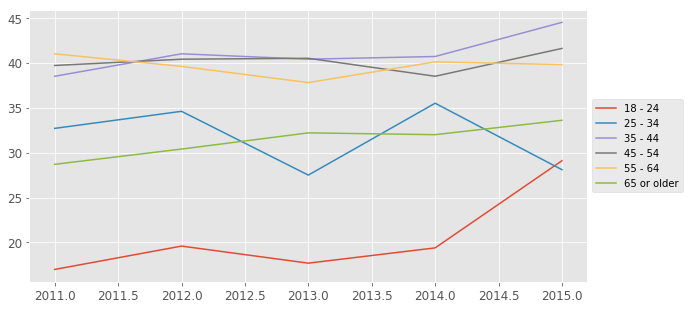

In [419]:
fig, axs = plt.subplots(figsize=(10,5))

x = [2011,2012,2013,2014,2015]

for idx, val in enumerate(df_age_lou.index):
    axs.plot(x, df_age_lou.iloc[idx, 1:10:2], label=df_age_lou.index[idx])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [420]:
#hypothesis test
#25-34 vs 65+

#z test
# 2534 vs 65+, 2015, LOU
#null: the frequency 25-34 is obese is at most the frequency that 65+ is obese

a_2534_t = 441
a_2534_ob = 441*0.281

a_65_t = 1483
a_65_ob = 1483*0.336

a_tsize1 = 441 + 1483


In [421]:
shared_sample_freq_a1 = (a_2534_ob + a_65_ob) / a_tsize1
shared_sample_variance_a1 = a_tsize1 * (shared_sample_freq_a1 * (1 - shared_sample_freq_a1)) / (a_2534_t*a_65_t)

difference_in_proportions_a1 = stats.norm(0, np.sqrt(shared_sample_variance_a1))

In [422]:
a_2534_sample_freq = a_2534_ob / (a_2534_t)
a_65_sample_freq = a_65_ob / a_65_t
difference_in_sample_proportions_a1 = a_65_sample_freq - a_2534_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions_a1))

Difference in sample proportions: 0.05


In [423]:
p_value1 = 1 - difference_in_proportions_a1.cdf(difference_in_sample_proportions_a1)
print("p-value for AGE frequency comparison: {:2.10f}".format(p_value1))

p-value for AGE frequency comparison: 0.0150875034


Text(0.5,1,'Distribution of Difference in Sample Frequencies Assuming $H_0$, p-value: 0.015')

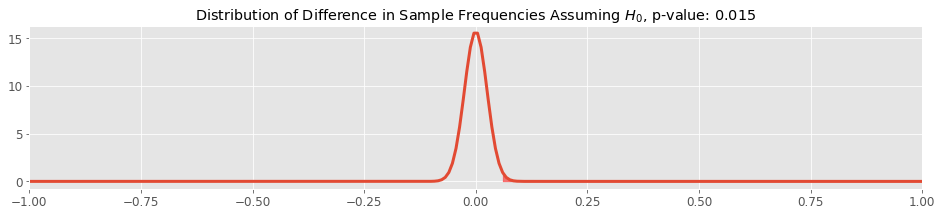

In [429]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions_a1.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions_a1.pdf(x), where=(x >= difference_in_sample_proportions_a1),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$, p-value: 0.015")

In [439]:
lou_2534 = df_age_lou.iloc[1,1:10:2].tolist()
lou_1824 = df_age_lou.iloc[0,1:10:2].tolist()
lou_65 = df_age_lou.iloc[5,1:10:2].tolist()

In [444]:
#null: there is no difference in the average %obesity for ages 18-24 and 65+

In [441]:
test_statistic_age = welch_test_statistic(lou_1824, lou_65)
print("Welch Test Statistic: {:2.2f}".format(test_statistic_age))

Welch Test Statistic: -5.15


In [442]:
df_l_253465 = welch_satterhwaithe_df(lou_1824, lou_65)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df_l_253465))

Degrees of Freedom for Welch's Test: 5.15


In [443]:
students_age = stats.t(df_l_253465)
p_value_age = students_age.cdf(test_statistic_age) + (1 - students_age.cdf(-test_statistic_age))
print("p-value for different average kickflip height: {:2.4f}".format(p_value_age))


p-value for different average kickflip height: 0.0033


Text(0.5,1,'p-value Reigon')

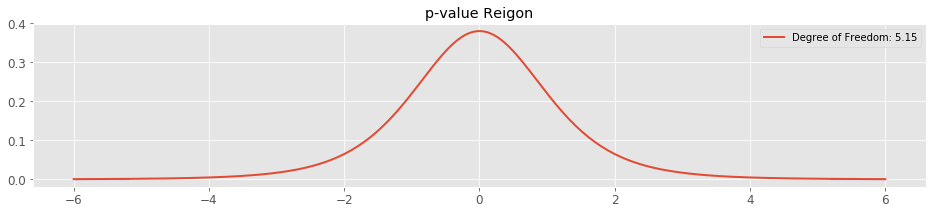

In [448]:
x = np.linspace(-6, 6, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(x, students_age.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df_l_253465))
_ = ax.fill_between(x, students_age.pdf(x), where=(x >= -test_statistic_age), color="blue", alpha=0.25)
_ = ax.fill_between(x, students_age.pdf(x), where=(x <= test_statistic_age), color="blue", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")